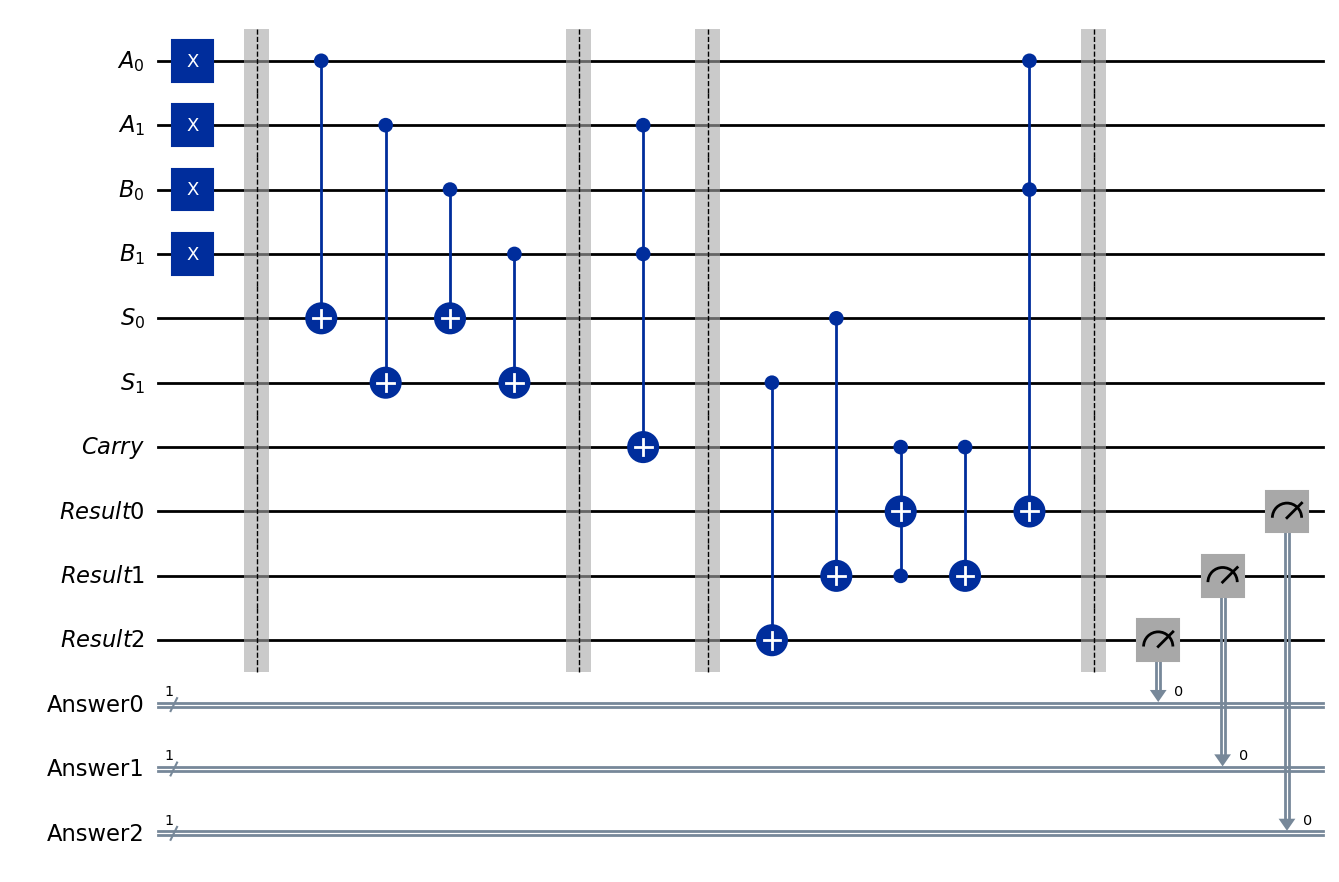

In [35]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.library import C3XGate

A = QuantumRegister(2 , 'A')
B = QuantumRegister(2 , 'B')

S = QuantumRegister(2 , 'S')
Cr = QuantumRegister(1 , 'Carry')

R0 = QuantumRegister(1 , 'Result0')
R1 = QuantumRegister(1 , 'Result1')
R2 = QuantumRegister(1 , 'Result2')

Ans0 = ClassicalRegister(1 , 'Answer0')
Ans1 = ClassicalRegister(1 , 'Answer1')
Ans2 = ClassicalRegister(1 , 'Answer2')



qc  = QuantumCircuit(A,B,S,Cr,R0,R1,R2,Ans0,Ans1,Ans2)


########################   Input values as binary   #######################

x = input("Enter a binary number:")
y = input("Enter another binary number:")

for i, bit in enumerate(x):
    if bit == '1':
        qc.x(A[i])

for i, bit in enumerate(y):
    if bit == '1':
        qc.x(B[i])

############################################################################

qc.barrier()

qc.cx(A[0],S[0])
qc.cx(B[0],S[0])
qc.cx(A[1],S[1])
qc.cx(B[1],S[1])

#qc.ccx(A[0],B[0],Cr[0])
#qc.ccx(A[1],B[1],Cr[1])

qc.barrier()


qc.ccx(A[1],B[1],Cr[0])
#qc.ccx(A[0],B[0],Cr[1])


qc.barrier()

qc.cx(S[1],R2)
qc.cx(S[0],R1)
qc.ccx(Cr[0],R1,R0)
qc.cx(Cr[0],R1)
#qc.cx(Cr[1],R0)
qc.ccx(A[0],B[0],R0)

qc.barrier()

qc.measure(R2[0],Ans0)
qc.measure(R1[0],Ans1)
qc.measure(R0[0],Ans2)

qc.draw("mpl")


{'1 1 0': 1024}


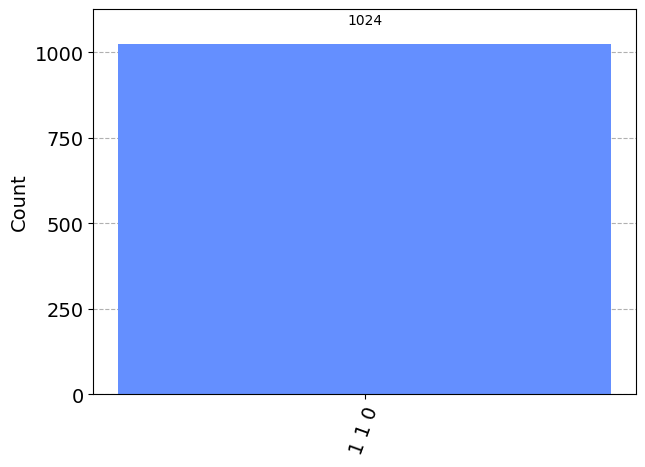

In [36]:
from qiskit_aer import AerSimulator


resultt = AerSimulator().run(qc).result()
stats = resultt.get_counts()

print(stats)

from qiskit.visualization import plot_histogram

plot_histogram(stats, target_string=True)